# Проект: 
# Родительский клуб "Драйвер ВОРДИ"

[Сайт](https://xn----7sbbgii0a7bmebnn.xn--p1ai/project/klub-driver/)

<hr style="border: 2px solid green;" />

**Цель исследования**:

- Разработать метрику, которая будет эффективно учитывать максимально широкий круг вопросов заказчика.
 
**Задачи**: 
1. Визуализация основных показателей заказчика
2. Определить для какой нозологии, какая именно помощь важна (в разрезе категорий)

**Этапы выполнения проекта**:
 1. Знакомство с данными
 2. Предобработка и исследовательски анализ данных (EDA)
- 2.1  Визуализация основных показателей заказчика
- 2.2  Определение для какой нозологии, какая помощь важна (в разрезе категорий)
 3. Выводы

**Описание данных**


**Таблица Мониторинг_2021:**
- Таблица содержит вопросы и ответы респондентов за 2021 год

**Таблица Мониторинг_2022:**
- Таблица содержит вопросы и ответы респондентов за 2022 год


<hr style="border: 2px solid green;" />

## Этап 1: Знакомство с данными

In [1]:
# Импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats as st
import requests
import re

In [2]:
# Cбросим ограничения на количество выводимых столбцов

pd.set_option('display.max_columns', None)

# Настроим вывод всего текста

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Загрузка датасета

df_21 = pd.read_excel(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\ДРАЙВЕР_ВОРДИ\Мониторинг_2021.xlsx')

df_22 = pd.read_excel(r'C:\Users\mirra\Desktop\Yandex.praktikum\Пасека\ДРАЙВЕР_ВОРДИ\Мониторинг_2022.xlsx')

In [4]:
# Выведем необходимые данные с общей информацией по всем датасетам

tables = {'df_21':df_21, 'df_22':df_22}

for name, table in tables.items():
    print(
        f'\n\033[1;30;46m_____________ДАТАСЕТ:  {name.upper()}_____________\033[0;0m\n',
        '\n\033[2;30;47m Вывод первых строк: \033[0;0m',
        )
    display(table.head(3))
    print('\n\033[2;30;47m Общая информация: \033[0;0m')
    display(table.info(memory_usage='deep'))
    print('\033[2;30;47m Подсчет доли пропусков в %: \033[0;0m')
    display(round(table.isnull().mean() * 100, 2))
    print(
        '\033[2;30;47m Подсчет дубликатов\033[0;0m', 
        '  ', round(table.duplicated().mean() * 100, 4),  ' %'
        )
    print('\n\033[2;30;47m Общая сводка строковых значений: \033[0;0m')
    try:
        display(table.describe(include=['object']).T)
    except:
        print('Датасет не содержит строковых значений')
    print('\n\033[2;30;47m Сводка числовых значений, включая даты: \033[0;0m')
    try:
        display(table.describe(datetime_is_numeric=True).T)
    except:
        print('Датасет не содержит числовых значений')
    print ('\n\033[01;30;46m_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________\033[0;0m\n\n')


_____________ДАТАСЕТ:  DF_21_____________
 
 Вывод первых строк: 


,Отметка времени,"1.1. Можно ли сказать, что в нашем регионе создана инклюзивное пространство (комфортная среда, позволяющая всем в равной степени получать и использовать блага цивилизации и услуг) для детей-инвалидов?","1.2. Можно ли сказать, что ваш ребенок имеет те же возможности (которыми он при желании может воспользоваться), что и здоровые дети?","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на труд]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на отдых]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на социальное обеспечение]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на охрану и помощь семье]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на жилище]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на охрану здоровья и медицинскую помощь]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на благоприятную окружающую среду]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на образование]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Свобода творчества]","1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Ранняя помощь (ранняя диагностика заболевания, помощь на ранних стадиях заболевания)]",1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Психолого-медико-педагогическая комиссия],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Дошкольное образование],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Школьное образование],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Дополнительное образование],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Медико-социальная экспертиза],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Технические средства реабилитации],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Санаторно-курортное лечение],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Адаптивная физкультура и спорт],[Здравоохранение],[Реабилитация],[Сопровождаемая занятость],[Сопровождаемое проживание],[Доступная среда],[Социально-психологическая помощь семье],[Правовая помощь],"[Социальная поддержка и помощь, социальные льготы]",[Паллиативная помощь],[Материальная помощь],[Деятельность дошкольных образовательных учреждений],[Деятельность школьных образовательных учреждений],[Деятельность учреждений дополнительного образования и развития для детей],[Деятельность учреждений здравоохранения],[Деятельность учреждений социальной защиты],[Деятельность учреждений культуры и отдыха],[Деятельность общественных организаций],"1.5. Обращались ли Вы за помощью, в связи с проблемами ребенка-инвалида, в официальные инстанции? [Материальная помощь]","1.5. Обращались ли Вы за помощью, в связи с проблемами ребенка-инвалида, в офиц


 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Columns: 407 entries, Отметка времени to 19.29. Даю согласие на обработку, хранение использование своих персональных данных:
dtypes: datetime64[ns](1), object(406)
memory usage: 41.0 MB


None

 Подсчет доли пропусков в %: 


Отметка времени                                                                                                                                                                                             0.00
1.1. Можно ли сказать, что в нашем регионе создана инклюзивное пространство (комфортная среда, позволяющая всем в равной степени получать и использовать блага цивилизации и услуг) для детей-инвалидов?    0.00
1.2. Можно ли сказать, что ваш ребенок имеет те же возможности (которыми он при желании может воспользоваться), что и здоровые дети?                                                                        0.00
1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на труд]                                                                     0.00
1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на отдых]                            

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
"1.1. Можно ли сказать, что в нашем регионе создана инклюзивное пространство (комфортная среда, позволяющая всем в равной степени получать и использовать блага цивилизации и услуг) для детей-инвалидов?",997,5,"Да, по крайней мере для этого много делается и...",407
"1.2. Можно ли сказать, что ваш ребенок имеет те же возможности (которыми он при желании может воспользоваться), что и здоровые дети?",997,4,"Скорее нет, для этого приходится прилагать дос...",357
"1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на труд]",997,3,Да,445
"1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на отдых]",997,3,Да,546
"1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на социальное обеспечение]",997,3,Да,553
...,...,...,...,...
19.25. Укажите Ваш статус по отношению к ребенку,997,9,Мать,925
19.26. Укажите Ваш возраст:,997,7,От 31 до 39 лет,524
"19.27. Будем благодарны, если Вы пожелаете указать свой телефон, для уточнения проблем",311,85,89205,31
"19.28. Будем благодарны, если Вы пожелаете указать свой e-mail адрес, для уточнения проблем",255,20,mail.ru,97



 Сводка числовых значений, включая даты: 


,count,mean,min,25%,50%,75%,max
Отметка времени,997,2021-05-22 12:13:38.689278720,2021-04-22 22:41:17.403,2021-05-19 23:35:04.632999936,2021-05-24 16:02:17.455000064,2021-05-28 15:13:39.987000064,2021-06-16 06:50:38.831



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________



_____________ДАТАСЕТ:  DF_22_____________
 
 Вывод первых строк: 


,Отметка времени,"1.1. Можно ли сказать, что в нашем регионе создана инклюзивное пространство (комфортная среда, позволяющая всем в равной степени получать и использовать блага цивилизации и услуг) для детей-инвалидов?","1.2. Можно ли сказать, что ваш ребенок имеет те же возможности (которыми он при желании может воспользоваться), что и здоровые дети?","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на труд]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на отдых]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на социальное обеспечение]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на охрану и помощь семье]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на жилище]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на охрану здоровья и медицинскую помощь]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на благоприятную окружающую среду]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на образование]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Свобода творчества]","1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на психологическую помощь]","1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Ранняя помощь (ранняя диагностика заболевания, помощь на ранних стадиях заболевания)]",1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Психолого-медико-педагогическая комиссия],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Дошкольное образование],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Школьное образование],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Дополнительное образование],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Медико-социальная экспертиза],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Технические средства реабилитации],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Санаторно-курортное лечение],1.4. Насколько Вы удовлетворены оказываемой помощью и качеством предоставляемых социальных услуг в обеспечении Вашего ребенка? [Адаптивная физкультура и спорт],[Здравоохранение],[Реабилитация],[Сопровождаемая занятость],[Сопровождаемое проживание],[Доступная среда],[Социально-психологическая помощь семье],[Правовая помощь],"[Социальная поддержка и помощь, социальные льготы]",[Паллиативная помощь],[Материальная помощь],[Деятельность дошкольных образовательных учреждений],[Деятельность школьных образовательных учреждений],[Деятельность учреждений дополнительного образования и развития для детей],[Деятельность учреждений здравоохранения],[Деятельность учреждений социальной защиты],[Деятельность учреждений культуры и отдыха],[Деятельность общественных организаций],"1.5. Обращались ли Вы за помощью, в связи с п


 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Columns: 444 entries, Отметка времени to  [Ряд 9]
dtypes: datetime64[ns](1), float64(1), object(442)
memory usage: 47.5 MB


None

 Подсчет доли пропусков в %: 


Отметка времени                                                                                                                                                                                              0.00
1.1. Можно ли сказать, что в нашем регионе создана инклюзивное пространство (комфортная среда, позволяющая всем в равной степени получать и использовать блага цивилизации и услуг) для детей-инвалидов?     0.00
1.2. Можно ли сказать, что ваш ребенок имеет те же возможности (которыми он при желании может воспользоваться), что и здоровые дети?                                                                         0.00
1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на труд]                                                                      0.00
1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на отдых]                        

 Подсчет дубликатов    0.0  %

 Общая сводка строковых значений: 


,count,unique,top,freq
"1.1. Можно ли сказать, что в нашем регионе создана инклюзивное пространство (комфортная среда, позволяющая всем в равной степени получать и использовать блага цивилизации и услуг) для детей-инвалидов?",1111,4,"Да, по крайней мере для этого много делается и...",559
"1.2. Можно ли сказать, что ваш ребенок имеет те же возможности (которыми он при желании может воспользоваться), что и здоровые дети?",1111,4,"Скорее да, исключая некоторые варианты, но зде...",463
"1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на труд]",1111,3,Да,636
"1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на отдых]",1111,3,Да,689
"1.3. Как Вы считаете, соблюдаются ли в полной мере социальные права и свободы настоящего и будущего для вашего ребенка? [Право на социальное обеспечение]",1111,3,Да,762
...,...,...,...,...
"21.27. Будем благодарны, если Вы пожелаете указать свой телефон, для уточнения проблем",334,99,89205,32
"21.28. Будем благодарны, если Вы пожелаете указать свой e-mail адрес, для уточнения проблем",353,25,mail.ru,131
"21.28. Будем благодарны, если Вы пожелаете указать свой e-mail адрес, для уточнения проблем.1",388,348,-,12
"21.29. Даю согласие на обработку, хранение использование своих персональных данных:",1111,1,Да,1111



 Сводка числовых значений, включая даты: 


,count,mean,min,25%,50%,75%,max,std
Отметка времени,1111,2022-05-20 03:16:20.726188288,2022-04-09 14:42:26.110,2022-04-27 16:20:48.604,2022-05-25 23:48:27.903000064,2022-06-03 09:00:13.597500160,2022-06-30 10:45:22.465,NaN
[Ряд 9],0.00,NaT,NaT,NaT,NaT,NaT,NaT,NaN



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________




In [5]:
# Проверим наличие полных дубликатов

print("Количество полных дубликатов в датасете за 2021: {}".format(df_21.duplicated().sum()))
print("Количество полных дубликатов в датасете за 2022: {}".format(df_22.duplicated().sum()))

Количество полных дубликатов в датасете за 2021: 0
Количество полных дубликатов в датасете за 2022: 0


### Выводы:

**Датасет df_21**
1. Датасет содержит 997 записей - количество респондентов;
2. 407 колонок датасета содержат вопросы к респондентам (родителям, опекунам);
3. Пропуски в данных присутствуют, например, это вопросы, касающиеся контактов респондентов   
4. Дубликаты в данных отсутствуют
5. Ошибок в строковых значениях нет
6. Датасет почти не содержит числовые значений:
   - Есть отметка о дате проведения опроса
   - Колонка [Ряд 9]	

**Датасет df_22**
1. Датасет содержит 1111 записей - количество респондентов;
2. 444 колонок датасета содержат вопросы к респондентам (родителям, опекунам);
3. Пропуски в данных присутствуют, например, это вопросы, касающиеся контактов респондентов   
4. Дубликаты в данных отсутствуют
5. Ошибок в строковых значениях нет
6. Датасет почти не содержит числовые значений:
   - Есть отметка о дате проведения опроса
   - Колонка [Ряд 9]	

**Общее**
- Количество вопросов и респондентов в 2022 увеличилось 


<hr style="border: 2px solid green;" />

## Этап 2: Предобработка данных и EDA

### Этап 2.1: Визуализация некоторых показателей заказчика  
    - Нозологии
    - Возраст ребенка
    - Место жительства
    - Статус ребенка
    - Возраст родителя

In [6]:
# Удаление лишних символов (цифр) в колонке с названиями вопросов
df_21.columns = df_21.columns.map(lambda x: re.sub('[0-9.]', '', x))
df_22.columns = df_22.columns.map(lambda x: re.sub('[0-9.]', '', x))

In [7]:
# Удаление первого пробела в колонке с названиями вопросов
df_21.columns = df_21.columns.map(lambda x: re.sub(r"^\s+", "", x))
df_22.columns = df_22.columns.map(lambda x: re.sub(r"^\s+", "", x))

In [38]:
# Ищем неявные дубликаты в тексте вопроса анкеты
print("Количество дубликатов в вопросах анкеты в 2021: {}".format(df_21.columns.duplicated().sum()))
print("Количество дубликатов в вопросах анкеты в 2021: {}".format(df_22.columns.duplicated().sum()))

Количество дубликатов в вопросах анкеты в 2021: 1
Количество дубликатов в вопросах анкеты в 2021: 2


In [34]:
# Ищем неявные дубликаты в тексте вопроса анкеты
print("Количество дубликатов в вопросах анкеты в 2021: {}".format(df_21.T.reset_index().rename(columns={'index':'вопрос'}).duplicated(subset='вопрос', keep='first').sum()))
print("Количество дубликатов в вопросах анкеты в 2022: {}".format(df_22.T.reset_index().rename(columns={'index':'вопрос'}).duplicated(subset='вопрос', keep='first').sum()))

Количество дубликатов в вопросах анкеты в 2021: 1
Количество дубликатов в вопросах анкеты в 2022: 2


**Комментарии:**

- Рассмотрим общую картину по нозологиям, какие встречаются чаще, какой возраст детей и родителей\опекунов, какой статус имеют дети и где проживают
- Чтобы не возникло путаницы с вопросами, нумерацию не удаляю 

In [8]:
# Функция удаления пробелов и приведения к нижнему регистру

def text_edit(df, question):
    df[question] = (
    df[question].str.strip()
    )
    df[question] = (
    df[question].str.lower()
    )

In [9]:
# Функция для группировки значений

def groups_of_ans(df, question, title):
    groups = (
    df[question].value_counts().head(15)
    .to_frame()
    .reset_index()
    .rename(columns={'index':'name', title: 'quantity'})
    )
    return groups

In [10]:
# Функция для визуализации 

def nozology_visualization(df_name, title):
    plt.figure(figsize=(10, 5))
    plt.grid(True)
    sns.barplot(x='quantity', y='name', data=df_name, palette="RdPu", saturation=.5)
    sns.set_style("whitegrid")
    plt.title(title, size=14)
    plt.xlabel('Количество ответов в анкете', size=13)
    plt.ylabel('Название нозологии', size=13)
    plt.show()

### Нозология

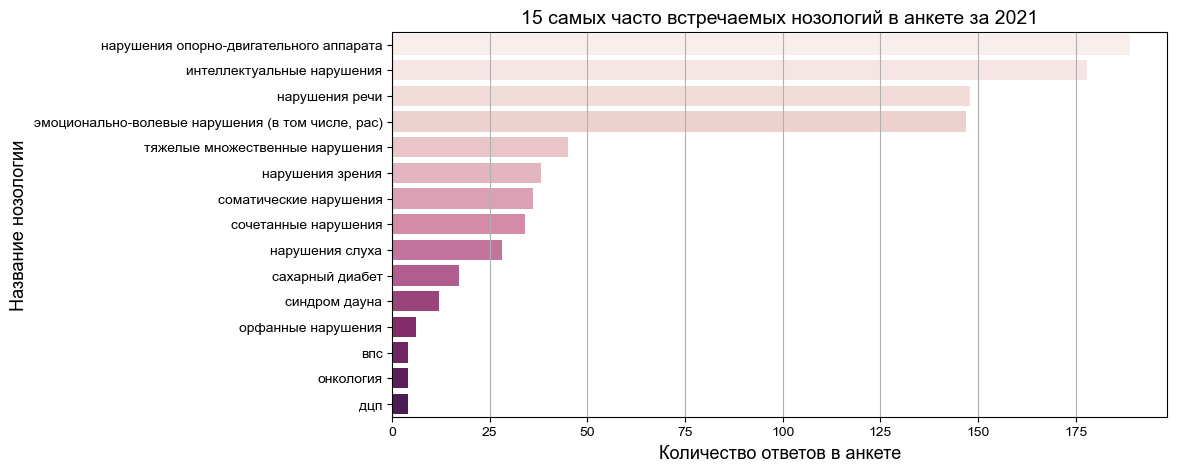

In [11]:
# 15 самых часто встречаемых нозологий в анкете за 2021

text_edit(df_21, 'С каким заболеванием связана инвалидность ребенка?')    

nozology_count_21 = (
    groups_of_ans(df_21, 'С каким заболеванием связана инвалидность ребенка?', 
                  'С каким заболеванием связана инвалидность ребенка?')
)

nozology_visualization(nozology_count_21, '15 самых часто встречаемых нозологий в анкете за 2021')  

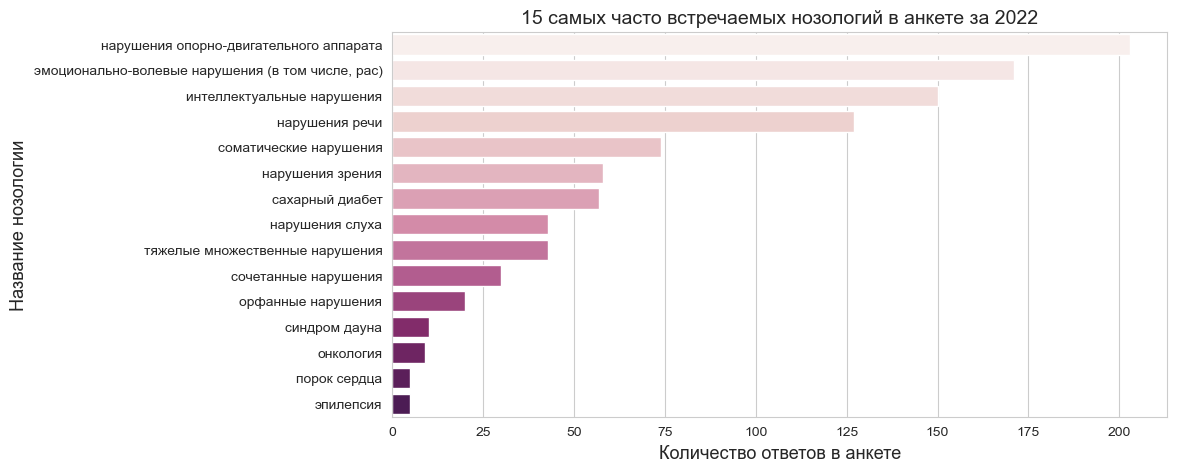

In [12]:
# 15 самых часто встречаемых нозологий в анкете за 2022

text_edit(df_22, 'С каким заболеванием связана инвалидность ребенка?')    

nozology_count_22 = (
    groups_of_ans(df_22, 'С каким заболеванием связана инвалидность ребенка?', 
                  'С каким заболеванием связана инвалидность ребенка?')
)

nozology_visualization(nozology_count_22, '15 самых часто встречаемых нозологий в анкете за 2022')  

**Вывод к графикам:**

- В 2021 и в 2022 на первом месте по частоте встречаемости нозология "нарушения опорно-двигательного аппарата"

- В 2021 первые три нозологии по частоте встречаемости: 
    - нарушения опорно-двигательного аппарата	
    - интеллектуальные нарушения	
    - нарушения речи

- В 2022 первые три нозологии по частоте встречаемости: 
    - нарушения опорно-двигательного аппарата
    - эмоционально-волевые нарушения (в том числе, рас) 
    - интеллектуальные нарушения

### Возраст ребенка

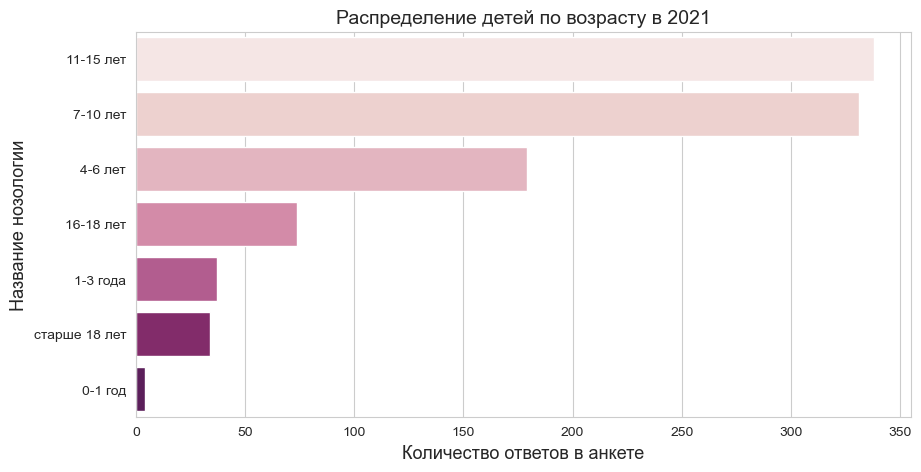

In [13]:
# Распределение детей по возрасту в 2021

text_edit(df_21, 'Укажите, пожалуйста, возраст ребенка-инвалида')  

nozology_age_2021 = (
    groups_of_ans(df_21, 'Укажите, пожалуйста, возраст ребенка-инвалида', 
                  'Укажите, пожалуйста, возраст ребенка-инвалида')
)

nozology_visualization(nozology_age_2021, 'Распределение детей по возрасту в 2021')  

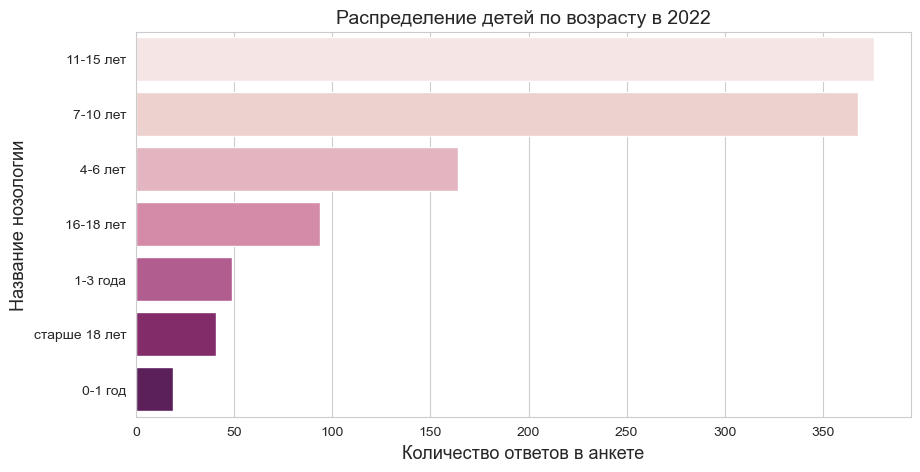

In [16]:
# Распределение детей по возрасту в 2022

text_edit(df_22, 'Укажите, пожалуйста, возраст ребенка-инвалида')  

nozology_age_2022 = (
    groups_of_ans(df_22, 'Укажите, пожалуйста, возраст ребенка-инвалида', 
                  'Укажите, пожалуйста, возраст ребенка-инвалида')
)

nozology_visualization(nozology_age_2022, 'Распределение детей по возрасту в 2022')  

**Вывод к графикам:**

- Среди анкетируемых у родителей\опекунов больше детей подросткового возраста (от 11 до 15 лет) и младшего школьного
- В возрасте до года меньше всего, вероятно, родители\опекуны еще не знают о наличии нозологии 

### Место жительства

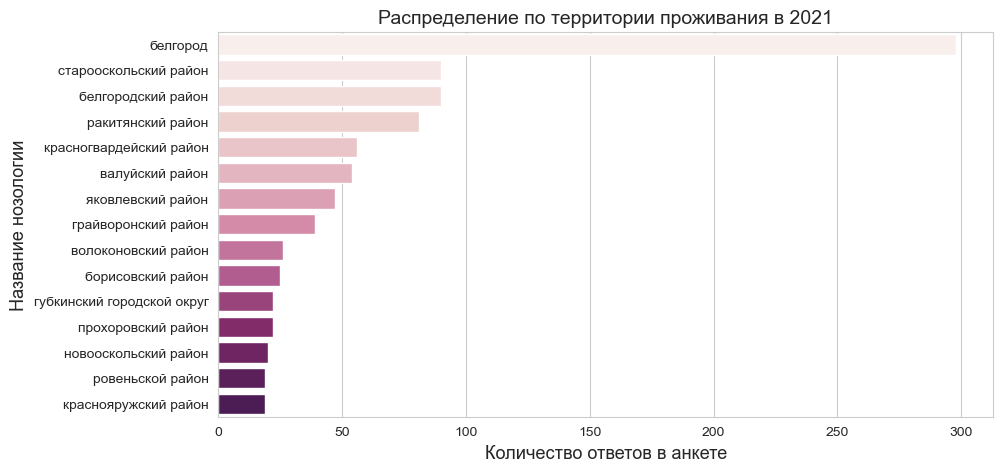

In [17]:
# Распределение по месту проживания в 2021

text_edit(df_21, 'Укажите, пожалуйста, территорию своего проживания:')  

nozology_area_2021 = (
    groups_of_ans(df_21, 'Укажите, пожалуйста, территорию своего проживания:', 
                  'Укажите, пожалуйста, территорию своего проживания:')
)

nozology_visualization(nozology_area_2021, 'Распределение по территории проживания в 2021')  

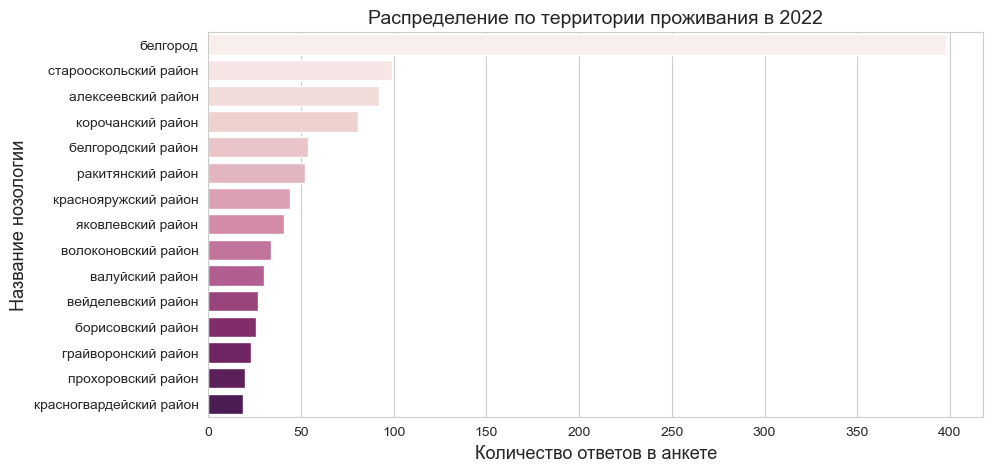

In [18]:
# Распределение по месту проживания в 2022

text_edit(df_22, 'Укажите, пожалуйста, территорию своего проживания:') 

nozology_area_2022 = (
    groups_of_ans(df_22, 'Укажите, пожалуйста, территорию своего проживания:', 
                  'Укажите, пожалуйста, территорию своего проживания:')
)

nozology_visualization(nozology_area_2022, 'Распределение по территории проживания в 2022')  

**Вывод к графикам:**

- Так как ассоциация зарегистрировала в Белгороде, ожидаемо, что большая часть семей обращается из этого города 

### Статус ребенка

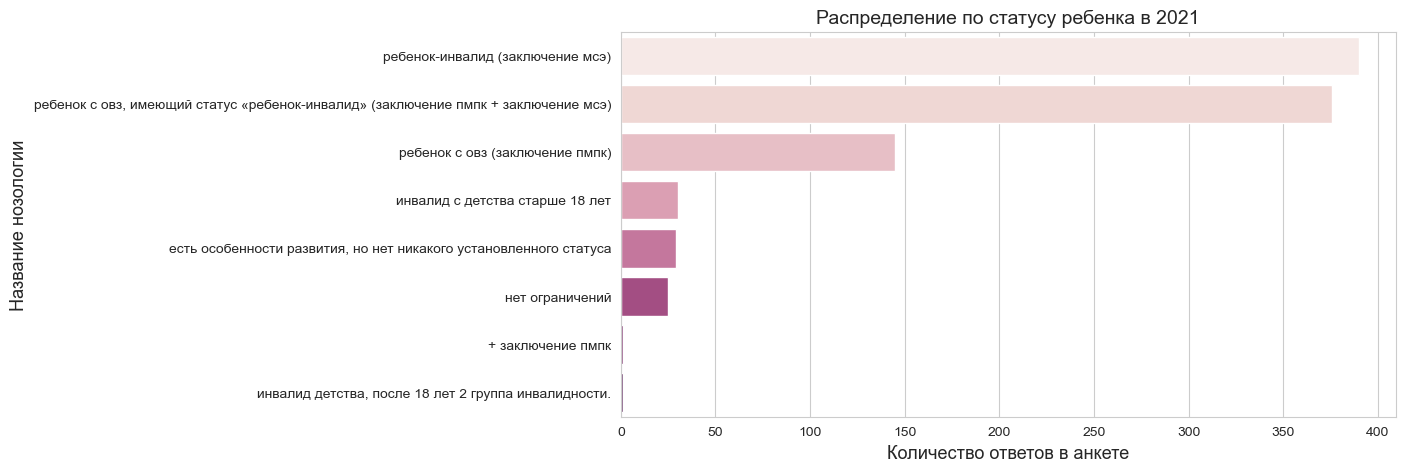

In [19]:
# Распределение по месту проживания в 2021

text_edit(df_21, 'Укажите, пожалуйста, статус Вашего ребенка') 

nozology_status_2021 = (
    groups_of_ans(df_21, 'Укажите, пожалуйста, статус Вашего ребенка', 
                  'Укажите, пожалуйста, статус Вашего ребенка')
)

nozology_visualization(nozology_status_2021, 'Распределение по статусу ребенка в 2021')

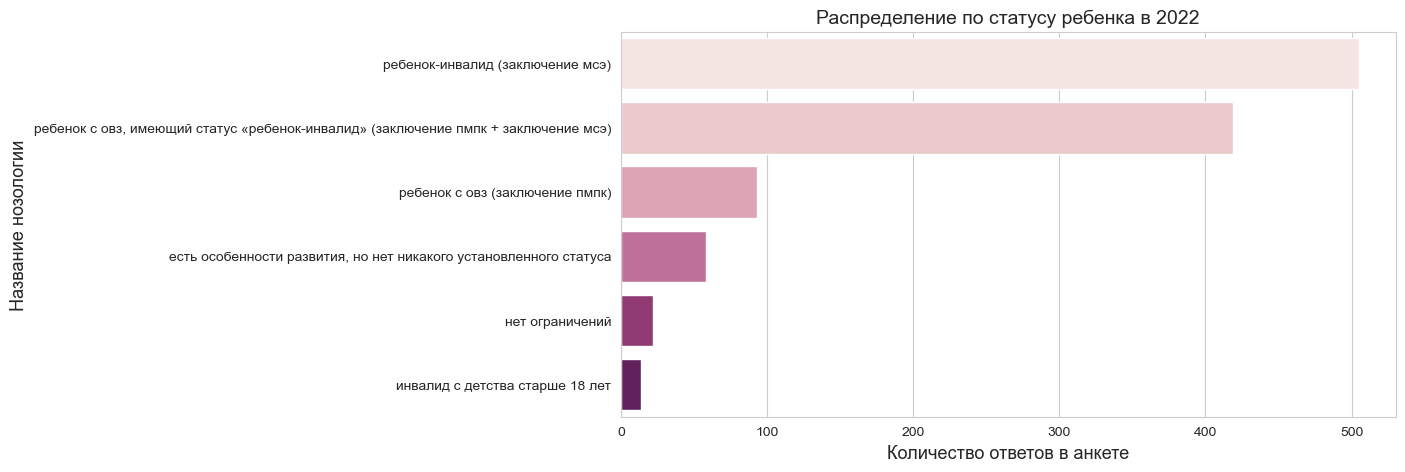

In [20]:
# Распределение по месту проживания в 2022

text_edit(df_22, 'Укажите, пожалуйста, статус Вашего ребенка') 

nozology_status_2022 = (
    groups_of_ans(df_22, 'Укажите, пожалуйста, статус Вашего ребенка', 
                  'Укажите, пожалуйста, статус Вашего ребенка')
)

nozology_visualization(nozology_status_2022, 'Распределение по статусу ребенка в 2022')  

**Вывод к графикам:**

- Большая часть детей имеют заключение медико-социальной экспертизы или психолого-медико-педагогической комиссии

### Возраст родителя\опекуна

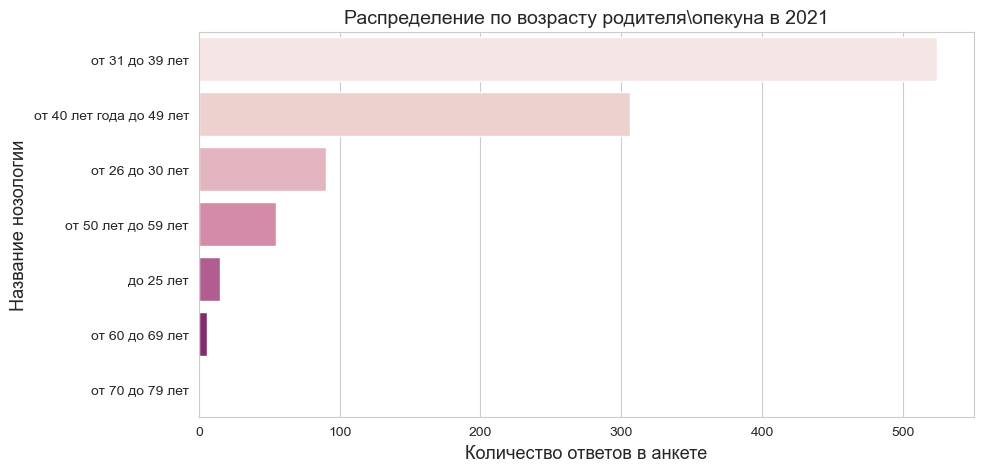

In [21]:
# Распределение по месту проживания в 2021

text_edit(df_21, 'Укажите Ваш возраст:') 

nozology_p_age_2021 = (
    groups_of_ans(df_21, 'Укажите Ваш возраст:', 
                  'Укажите Ваш возраст:')
)

nozology_visualization(nozology_p_age_2021, 'Распределение по возрасту родителя\опекуна в 2021')

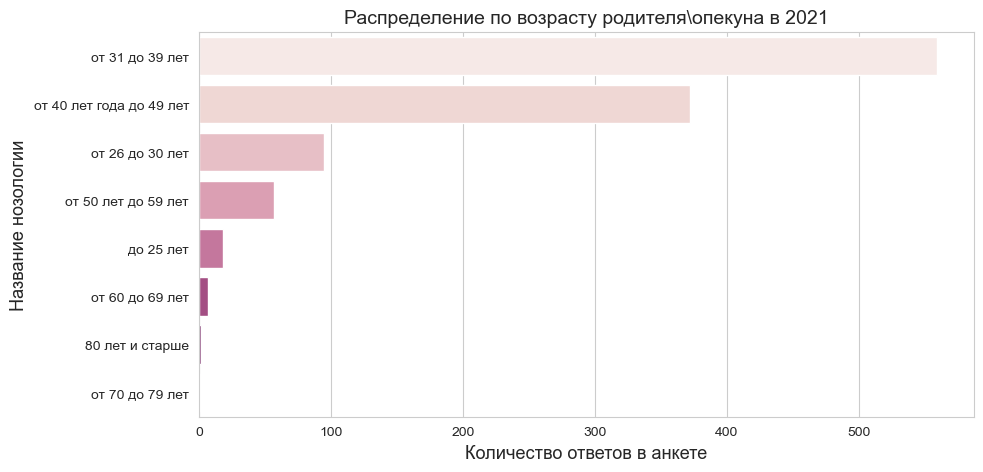

In [22]:
# Распределение по месту проживания в 2022

text_edit(df_22, 'Укажите Ваш возраст:') 

nozology_p_age_2022 = (
    groups_of_ans(df_22, 'Укажите Ваш возраст:', 
                  'Укажите Ваш возраст:')
)

nozology_visualization(nozology_p_age_2022, 'Распределение по возрасту родителя\опекуна в 2021')

**Вывод к графикам:**

- Большая часть родителей\опекунов попадает в категорию от 31 до 29 лет
- Далее следует от 40 до 49 лет
- Есть процент родственников\опекунов от 60 и старше

<hr style="border: 2px solid green;" />

### Этап 2.2: Преобразование датасетов и присвоение ответам весов
    - Транспонируем датасеты
    - Выделяем категорию из вопроса анкеты
    - Проставим веса ответам 
    - Посчитаем среднее в разрезе каждой категории и нозологии

In [23]:
# Транспонируем датасеты, чтобы вопросы стали столбцом 'вопрос'

df_21T = df_21.T.reset_index().rename(columns={'index':'вопрос'})
df_22T = df_22.T.reset_index().rename(columns={'index':'вопрос'})
print(df_21T.shape)
print(df_22T.shape)

(407, 998)
(444, 1112)


In [24]:
# df_21T[df_21T['вопрос'].str.contains('возраст') == True]
# df_21T.loc[403]['вопрос']

In [25]:
#df_21T[df_21T['вопрос'].str.contains('С каким заболеванием связана инвалидность ребенка') == True]

In [29]:
# Ответы с нозологиями сделаем названиями столбцов

df_21T.columns = df_21T.iloc[346]
df_21T = (
    df_21T.rename(columns={'С каким заболеванием связана инвалидность ребенка?' : 'вопрос'})
)

df_21T.head(2)

346,вопрос,+ сопутствующие,агенезия мозолистого тела,артрит,астма,атопический дермотит + асма+ ринит+плоскастопия,аутизм,аутизм,"аутизм (рас), дкмп.",аутоиммунное заболевание,аутоиммунное эндокринное заболевание,аутоимунное заболевание,бронхиальная астма,"бронхиальная астма, зпрр",вдкн,волчья пасть,впс,впс,впс,впс,врожденная потамология почки,врождённый порок сердца,врождённый порок сердца,генетика и сопутствующие,генетическое заболевание,гиперактивность,гломерулонефрит,дерматит и астма брорхиальная,диабет,диабет,диабет,диабет,"диабет 1-го типа, инсулинозависимый",диабет 1типа,дцп,дцп,дцп,дцп,дцп задержка в развитии ребёнка . нет речи,"дцп, 1 группа","дцп,впс,зпр.",дыхательная деятельность,заболевание крови,заболевание почек,задержка развития,здоров,злокачественная опухоль,"значительное нарушение поведения, требующее ухода и лечения",зпр,"зпр, гидроцыфалия",имуннодефит,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуальные нарушения,интеллектуаль

In [30]:
df_22T.columns = df_22T.iloc[380]
#df_22T = df_22T.reindex(df_22T.index.drop(380))
df_22T = (
    df_22T.rename(columns={'С каким заболеванием связана инвалидность ребенка?' : 'вопрос'})
)

df_22T.head(2)

380,вопрос,нарушения опорно-двигательного аппарата,нарушения опорно-двигательного аппарата,нарушения опорно-двигательного аппарата,"эмоционально-волевые нарушения (в том числе, рас)",нарушения опорно-двигательного аппарата,нарушения опорно-двигательного аппарата,эпилепсия,"эмоционально-волевые нарушения (в том числе, рас)",нарушения опорно-двигательного аппарата,нарушения речи,соматические нарушения,"эмоционально-волевые нарушения (в том числе, рас)",нарушения речи,нарушения опорно-двигательного аппарата,интеллектуальные нарушения,интеллектуальные нарушения,"эмоционально-волевые нарушения (в том числе, рас)",сахарный диабет,нарушения речи,"эмоционально-волевые нарушения (в том числе, рас)",интеллектуальные нарушения,интеллектуальные нарушения,нарушения опорно-двигательного аппарата,тяжелые множественные нарушения,сахарный диабет,интеллектуальные нарушения,"эмоционально-волевые нарушения (в том числе, рас)",нарушения опорно-двигательного аппарата,интеллектуальные нарушения,"эмоционально-волевые нарушения (в том числе, рас)","эмоционально-волевые нарушения (в том числе, рас)","эмоционально-волевые нарушения (в том числе, рас)",нарушения зрения,"эмоционально-волевые нарушения (в том числе, рас)","эмоционально-волевые нарушения (в том числе, рас)",интеллектуальные нарушения,нарушения опорно-двигательного аппарата,эпилепсия,нарушения зрения,нарушения опорно-двигательного аппарата,сахарный диабет,"эмоционально-волевые нарушения (в том числе, рас)","эмоционально-волевые нарушения (в том числе, рас)","эмоционально-волевые нарушения (в том числе, рас)","эмоционально-волевые нарушения (в том числе, рас)","эмоционально-волевые нарушения (в том числе, рас)","эмоционально-волевые нарушения (в том числе, рас)","эмоционально-волевые нарушения (в том числе, рас)","эмоционально-волевые нарушения (в том числе, рас)","эмоционально-волевые нарушения (в том числе, рас)",интеллектуальные нарушения,интеллектуальные нарушения,тяжелые множественные нарушения,интеллектуальные нарушения,нарушения опорно-двигательного аппарата,нарушения речи,интеллектуальные нарушения,интеллектуальные нарушения,орфанные нарушения,соматические нарушения,соматические нарушения,нарушения опорно-двигательного аппарата,соматические нарушения,"эмоционально-волевые нарушения (в том числе, рас)",нарушения опорно-двигательного аппарата,сочетанные нарушения,нарушения опорно-двигательного аппарата,"эмоционально-волевые нарушения (в том числе, рас)","эмоционально-волевые нарушения (в том числе, рас)",орфанные нарушения,сочетанные нарушения,соматические нарушения,нарушения зрения,врожденный порок сердца,нарушения речи,нарушения опорно-двигательного аппарата,"эмоционально-волевые нарушения (в том числе, рас)",соматические нарушения,соматические нарушения,нарушения речи,соматические нарушения,сахарный диабет,нарушения опорно-двигательного аппарата,нарушения опорно-двигательного аппарата,"эмоционально-волевые нарушения (в том числе, рас)",нарушения опорно-двигательного аппарата,нарушения опорно-двигательного аппарата,нарушения речи,нарушения слуха,тяжелые множественные нарушения,нарушения опорно-двигательного аппарата,сахарный диабет,соматические нарушения,онкология,нарушения опорно-двигательного аппарата,сахарный диабет,нарушения опорно-двигательного аппарата,нарушения опорно-двигательного аппарата,соматические нарушения,соматические нарушения,нарушения опорно-двигательного аппарата,сахарный диабет,"эмоционально-волевые нарушения (в том числе, рас)",сахарный диабет,интеллектуальные нарушения,интеллектуальные нарушения,"эмоционально-волевые нарушения (в том числе, рас)",нарушения опорно-двигательного аппарата,интеллектуальные нарушения,интеллектуальные нарушения,нарушения опорно-двигательного аппарата,сахарный диабет,тяжелые множественные нарушения,нарушения опорно-двигательного аппарата,"эмоционально-волевые нарушения (в том числе, рас)",сахарный диабет,соматические нарушения,сахарный диабет,соматические нарушения,сахарный диабет,сахарный диабет,орфанные нарушения,нарушения опорно-двиг

In [29]:
# Вытаскиваем категорию из текста вопроса

def get_text(_text):
    result = re.findall(r'\[(.*?)\]', _text)
   
    if result:
        return result[0]
    else:
        print(f"cannot find in {_text}")
    return "Категория не указана"

df_21T['категория'] = df_21T['вопрос'].apply(lambda x: get_text(x))
df_22T['категория'] = df_22T['вопрос'].apply(lambda x: get_text(x))
#s.split('[')[1].split(']')[0] 

cannot find in Отметка времени
cannot find in 1.1. Можно ли сказать, что в нашем регионе создана инклюзивное пространство (комфортная среда, позволяющая всем в равной степени получать и использовать блага цивилизации и услуг) для детей-инвалидов?
cannot find in 1.2. Можно ли сказать, что ваш ребенок имеет те же возможности (которыми он при желании может воспользоваться), что и здоровые дети?
cannot find in 2.1. Была ли оказана ранняя помощь для Вашего ребенка в постановке диагноза и лечения
cannot find in 2.2. Если ваш ребенок не получил раннюю медицинскую помощь, то по какой причине (если получил, переходите к другому вопросу)?
cannot find in 2.5. Какие проблемы Вы могли бы обозначить в организации ранней помощи ребенку-инвалиду?
cannot find in 3.1. Пользовались ли Вы услугами психолого-медико-педагогической комиссии для Вашего ребенка?
cannot find in 3.2. Если Вы не пользовались услугами психолого-медико-педагогической комиссии для Вашего ребенка, в чем причина?
cannot find in 3.5. К

In [30]:
# Список категорий за 2021

cat_list_2021 = (
    df_21T['категория'].value_counts()
    .head(11)
    .to_frame()
    .reset_index()
    .rename(columns={'index':'категория', 'категория':'количество вопросов'})
    .loc[1:]
)

cat_list_2021

,категория,количество вопросов
1,Финансирование,15
2,Доступная среда внутри организации,15
3,"Возможность добраться до организации, предоста...",15
4,Доступность консультации специалистов по вопро...,15
5,Доступность информации о предоставлении такой ...,15
6,"Доступность (наличие) организаций, предоставля...",15
7,Информирование населения,15
8,Квалификация специалистов,15
9,Количество специалистов,15
10,Инфраструктура,15


In [31]:
# Список категорий 2022

cat_list_2022 = (
    df_22T['категория'].value_counts()
    .head(11)
    .to_frame()
    .reset_index()
    .rename(columns={'index':'категория', 'категория':'количество вопросов'})
    .loc[1:]
)
cat_list_2022

,категория,количество вопросов
1,Доступность информации о предоставлении такой ...,18
2,Доступность консультации специалистов по вопро...,18
3,"Доступность (наличие) организаций, предоставля...",18
4,"Возможность добраться до организации, предоста...",18
5,Доступная среда внутри организации,18
6,Инфраструктура,17
7,Количество специалистов,17
8,Квалификация специалистов,17
9,Информирование населения,17
10,Финансирование,17


**Комментарии:**

- В 2022 категории немного дополнили вопросами, вероятно ассоциация хотела по-другому расставить акценты в анкете, потому что на первый план вышли категории и вопросы, касающиеся доступности (информации)

In [32]:
print('Количество вопросов, где категория не указана  в 2021:', df_21T[df_21T['категория'] == "Категория не указана"]['категория'].count())
print('Доля вопросов, где категория не указана:', (
    df_21T[df_21T['категория'] == "Категория не указана"]['категория'].count() / df_21T['вопрос'].count())*100
)

Количество вопросов, где категория не указана  в 2021: 90
Доля вопросов, где категория не указана: 22.11302211302211


In [33]:
print('Количество вопросов, где категория не указана в 2022:', df_22T[df_22T['категория'] == "Категория не указана"]['категория'].count())
print('Доля вопросов, где категория не указана:', (
    df_22T[df_22T['категория'] == "Категория не указана"]['категория'].count() / df_22T['вопрос'].count())*100
)

Количество вопросов, где категория не указана в 2022: 98
Доля вопросов, где категория не указана: 22.07207207207207


**Комментарии:**

- В анкетах за 2021 и за 2021 есть около 22% вопросов, категория у которых не указана, рассмотрим эти вопросы ниже.

In [34]:
df_21T[df_21T['категория'] == "Категория не указана"]['вопрос'].head(15)

0                                        Отметка времени
1      1.1. Можно ли сказать, что в нашем регионе соз...
2      1.2. Можно ли сказать, что ваш ребенок имеет т...
55     2.1. Была ли оказана ранняя помощь для Вашего ...
56     2.2. Если ваш ребенок не получил раннюю медици...
67     2.5. Какие проблемы Вы могли бы обозначить в о...
68     3.1. Пользовались ли Вы услугами психолого-мед...
69     3.2. Если Вы не пользовались услугами психолог...
80     3.5. Какие проблемы Вы могли бы обозначить в о...
84     4.2. Если Ваш ребенок не посещает и не посещал...
85     4.3. Если ваш ребенок посещает образовательную...
86     4.4. Есть ли в образовательной организации для...
87     4.5. Получает ли ребенок психолого-педагогичес...
88      4.6. Получаете ли вы коррекционные услуги и где?
109    4.11. Какие проблемы Вы могли бы обозначить в ...
Name: вопрос, dtype: object

In [35]:
df_22T[df_22T['категория'] == "Категория не указана"]['вопрос'].head(15)

0                                        Отметка времени
1      1.1. Можно ли сказать, что в нашем регионе соз...
2      1.2. Можно ли сказать, что ваш ребенок имеет т...
56     2.1. Была ли оказана ранняя помощь для Вашего ...
57     2.2. Если ваш ребенок не получил раннюю медици...
68     2.5. Какие проблемы Вы могли бы обозначить в о...
69     3.1. Пользовались ли Вы услугами психолого-мед...
70     3.2. Если Вы не пользовались услугами психолог...
81     3.5. Какие проблемы Вы могли бы обозначить в о...
87     4.2. Если Ваш ребенок не посещает и не посещал...
88     4.3. Если ваш ребенок посещает образовательную...
89     4.4. Есть ли в образовательной организации для...
90     4.5. Получает ли ребенок психолого-педагогичес...
91      4.6. Получаете ли вы коррекционные услуги и где?
122    4.13. Какие проблемы Вы могли бы обозначить в ...
Name: вопрос, dtype: object

**1. Рассмотри 10 категорий с наибольшим количеством вопросов в разрезе нозологий, чтобы выделить, чего больше не хватает той или ной нозологии.**

**Категории:**
- Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях    
- Доступность консультации специалистов по вопросу услуги                                                           
- Доступность (наличие) организаций, предоставляющих услугу                                                         
- Возможность добраться до организации, предоставляющей услугу                                                      
- Доступная среда внутри организации                                                                                
- Инфраструктура                                                                                                    
- Количество специалистов                                                                                           
- Квалификация специалистов                                                                                         
- Информирование населения                                                                                          
- Финансирование           


**2. Оцифруем данные (веса: 0, 1, 2, 3):**

    - Для пропусков и ответов 'Затрудняюсь оценить' - укажем вес 0
    - Для ответов, говорящих о полной недоступности, недостаточности или неудовлетворенности - укажем 1 
    - Для ответов, говорящих о частичной доступности, достаточности и удовлетворенности - укажем 2
    - Для ответов, говорящих о полной доступности, достаточности и удовлетворенности - укажем 3 


**3. Посчитаем среднюю оценку респондентов в каждой категории в разрезе нозологии**

In [36]:
# Заполним пропуски

df_21T = df_21T.fillna('Пропущено')
df_22T = df_22T.fillna('Пропущено')

In [37]:
# Функция для выделения нужной категории

def category(df_name, cat_name, noz_name):
    #df_name = df_21.query('категория == @cat_name')
    df_name = df_name[df_name['категория'] == cat_name]
    df_name = df_name.drop(['вопрос', 'категория'], axis=1)
    df_name = df_name.filter(like=noz_name)
    return df_name

In [38]:
# Функция присвоения весов

def category_values(df_name):
    df_name = (
    df_name.replace({'Пропущено':0, 'Затрудняюсь оценить': 0, 'Совершенно недостаточно': 1, 
                             "Необходимо больше":2, "Достаточно": 3,  'Не доступно': 1, 
                            "Частично доступно":2, "Доступно": 3, 'Не пользовался и не собираюсь': 0, 
                     'Пользовался и больше не собираюсь': 1, 'Не пользовался, но хотел бы воспользоваться': 2, 
                     'Пользовался и хотел бы воспользоваться еще': 3, 'Удовлетворен полностью': 3, 'Удовлетворен частично': 2,
                    "Не удовлетворен": 1})
    )
    
    return df_name

In [39]:
# Функция подсчета медианы по каждому респонденту и среднего по всем ответам медианным значениям в разрезе нозологии

def category_mean(df_name, cat_name):
    df_name['median'] = round(df_name.median(axis = 1), 2)
    return print('Средняя оценка респондентов в категории', cat_name, ':', df_name['median'].mean())

In [40]:
# Функция для предоставления результатов

def total_value(df_base, cat_name, noz_name):
    df_name = category(df_base, cat_name, noz_name)
    df_name = category_values(df_name)
    df_name['median'] = round(df_name.median(axis = 1), 2)
    return print('Средняя оценка в категории', cat_name, 'для нозологии', noz_name , round(df_name['median'].mean(), 2))

**Категория Финансирование**

In [41]:
# в 2021 году

total_value(df_21T, 'Финансирование', 'нарушения опорно-двигательного аппарата')
total_value(df_21T, 'Финансирование', 'интеллектуальные нарушения')
total_value(df_21T, 'Финансирование', 'нарушения речи')
total_value(df_21T, 'Финансирование', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_21T, 'Финансирование', 'тяжелые множественные нарушения')
total_value(df_21T, 'Финансирование', 'нарушения зрения')
total_value(df_21T, 'Финансирование', 'соматические нарушения')
total_value(df_21T, 'Финансирование', 'сочетанные нарушения')
total_value(df_21T, 'Финансирование', 'нарушения слуха')
total_value(df_21T, 'Финансирование', 'сахарный диабет')
total_value(df_21T, 'Финансирование', 'синдром дауна')
total_value(df_21T, 'Финансирование', 'орфанные нарушения')
total_value(df_21T, 'Финансирование', 'впс')
total_value(df_21T, 'Финансирование', 'онкология')
total_value(df_21T, 'Финансирование', 'дцп')

Средняя оценка в категории Финансирование для нозологии нарушения опорно-двигательного аппарата 1.4
Средняя оценка в категории Финансирование для нозологии интеллектуальные нарушения 1.27
Средняя оценка в категории Финансирование для нозологии нарушения речи 0.4
Средняя оценка в категории Финансирование для нозологии эмоционально-волевые нарушения (в том числе, рас) 0.93
Средняя оценка в категории Финансирование для нозологии тяжелые множественные нарушения 1.13
Средняя оценка в категории Финансирование для нозологии нарушения зрения 1.03
Средняя оценка в категории Финансирование для нозологии соматические нарушения 1.23
Средняя оценка в категории Финансирование для нозологии сочетанные нарушения 0.83
Средняя оценка в категории Финансирование для нозологии нарушения слуха 1.2
Средняя оценка в категории Финансирование для нозологии сахарный диабет 1.03
Средняя оценка в категории Финансирование для нозологии синдром дауна 0.67
Средняя оценка в категории Финансирование для нозологии орфан

In [42]:
# в 2022 году

total_value(df_22T, 'Финансирование', 'нарушения опорно-двигательного аппарата')
total_value(df_22T, 'Финансирование', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_22T, 'Финансирование', 'интеллектуальные нарушения')
total_value(df_22T, 'Финансирование', 'нарушения речи')
total_value(df_22T, 'Финансирование', 'соматические нарушения')
total_value(df_22T, 'Финансирование', 'нарушения зрения')
total_value(df_22T, 'Финансирование', 'сахарный диабет')
total_value(df_22T, 'Финансирование', 'нарушения слуха')
total_value(df_22T, 'Финансирование', 'тяжелые множественные нарушения')
total_value(df_22T, 'Финансирование', 'сочетанные нарушения')
total_value(df_22T, 'Финансирование', 'орфанные нарушения')
total_value(df_22T, 'Финансирование', 'синдром дауна')
total_value(df_22T, 'Финансирование', 'онкология')
total_value(df_22T, 'Финансирование', 'порок сердца')
total_value(df_22T, 'Финансирование', 'эпилепсия')

Средняя оценка в категории Финансирование для нозологии нарушения опорно-двигательного аппарата 1.35
Средняя оценка в категории Финансирование для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.18
Средняя оценка в категории Финансирование для нозологии интеллектуальные нарушения 1.06
Средняя оценка в категории Финансирование для нозологии нарушения речи 0.94
Средняя оценка в категории Финансирование для нозологии соматические нарушения 0.38
Средняя оценка в категории Финансирование для нозологии нарушения зрения 1.62
Средняя оценка в категории Финансирование для нозологии сахарный диабет 0.65
Средняя оценка в категории Финансирование для нозологии нарушения слуха 1.41
Средняя оценка в категории Финансирование для нозологии тяжелые множественные нарушения 0.88
Средняя оценка в категории Финансирование для нозологии сочетанные нарушения 1.41
Средняя оценка в категории Финансирование для нозологии орфанные нарушения 1.03
Средняя оценка в категории Финансирование для нозолог

**Вывод по категории Финансирование**

- В 2021 году лучшая оценка в разрезе финансирования (по шкале более 2) у нозологии: врождённый порок сердца. Т.е. ответы респондентов, говорят почти о полной доступности, достаточности и удовлетворенности. 
- В 2022 году все нозологии получили среднюю оценку ниже 2. Нозологии с самой высокой средней оценкой респондентов:
    - нарушения зрения (1.62)
    - нарушения слуха (1.41)
- Самая тревожная ситуация с финансированием (ниже единицы) у нозологий: порок сердца, онкология, синдром дауна, сахарный диабет, тяжелые множественные нарушения, нарушения речи.

**Категория Доступная среда внутри организации**

In [43]:
# в 2021 году

total_value(df_21T, 'Доступная среда внутри организации', 'нарушения опорно-двигательного аппарата')
total_value(df_21T, 'Доступная среда внутри организации', 'интеллектуальные нарушения')
total_value(df_21T, 'Доступная среда внутри организации', 'нарушения речи')
total_value(df_21T, 'Доступная среда внутри организации', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_21T, 'Доступная среда внутри организации', 'тяжелые множественные нарушения')
total_value(df_21T, 'Доступная среда внутри организации', 'нарушения зрения')
total_value(df_21T, 'Доступная среда внутри организации', 'соматические нарушения')
total_value(df_21T, 'Доступная среда внутри организации', 'сочетанные нарушения')
total_value(df_21T, 'Доступная среда внутри организации', 'нарушения слуха')
total_value(df_21T, 'Доступная среда внутри организации', 'сахарный диабет')
total_value(df_21T, 'Доступная среда внутри организации', 'синдром дауна')
total_value(df_21T, 'Доступная среда внутри организации', 'орфанные нарушения')
total_value(df_21T, 'Доступная среда внутри организации', 'впс')
total_value(df_21T, 'Доступная среда внутри организации', 'онкология')
total_value(df_21T, 'Доступная среда внутри организации', 'дцп')

Средняя оценка в категории Доступная среда внутри организации для нозологии нарушения опорно-двигательного аппарата 1.27
Средняя оценка в категории Доступная среда внутри организации для нозологии интеллектуальные нарушения 1.0
Средняя оценка в категории Доступная среда внутри организации для нозологии нарушения речи 0.47
Средняя оценка в категории Доступная среда внутри организации для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.13
Средняя оценка в категории Доступная среда внутри организации для нозологии тяжелые множественные нарушения 1.4
Средняя оценка в категории Доступная среда внутри организации для нозологии нарушения зрения 1.43
Средняя оценка в категории Доступная среда внутри организации для нозологии соматические нарушения 1.43
Средняя оценка в категории Доступная среда внутри организации для нозологии сочетанные нарушения 1.37
Средняя оценка в категории Доступная среда внутри организации для нозологии нарушения слуха 1.47
Средняя оценка в категории Досту

In [44]:
# в 2022 году

total_value(df_22T, 'Доступная среда внутри организации', 'нарушения опорно-двигательного аппарата')
total_value(df_22T, 'Доступная среда внутри организации', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_22T, 'Доступная среда внутри организации', 'интеллектуальные нарушения')
total_value(df_22T, 'Доступная среда внутри организации', 'нарушения речи')
total_value(df_22T, 'Доступная среда внутри организации', 'соматические нарушения')
total_value(df_22T, 'Доступная среда внутри организации', 'нарушения зрения')
total_value(df_22T, 'Доступная среда внутри организации', 'сахарный диабет')
total_value(df_22T, 'Доступная среда внутри организации', 'нарушения слуха')
total_value(df_22T, 'Доступная среда внутри организации', 'тяжелые множественные нарушения')
total_value(df_22T, 'Доступная среда внутри организации', 'сочетанные нарушения')
total_value(df_22T, 'Доступная среда внутри организации', 'орфанные нарушения')
total_value(df_22T, 'Доступная среда внутри организации', 'синдром дауна')
total_value(df_22T, 'Доступная среда внутри организации', 'онкология')
total_value(df_22T, 'Доступная среда внутри организации', 'порок сердца')
total_value(df_22T, 'Доступная среда внутри организации', 'эпилепсия')

Средняя оценка в категории Доступная среда внутри организации для нозологии нарушения опорно-двигательного аппарата 1.06
Средняя оценка в категории Доступная среда внутри организации для нозологии эмоционально-волевые нарушения (в том числе, рас) 0.89
Средняя оценка в категории Доступная среда внутри организации для нозологии интеллектуальные нарушения 0.94
Средняя оценка в категории Доступная среда внутри организации для нозологии нарушения речи 0.72
Средняя оценка в категории Доступная среда внутри организации для нозологии соматические нарушения 0.33
Средняя оценка в категории Доступная среда внутри организации для нозологии нарушения зрения 1.44
Средняя оценка в категории Доступная среда внутри организации для нозологии сахарный диабет 0.78
Средняя оценка в категории Доступная среда внутри организации для нозологии нарушения слуха 1.22
Средняя оценка в категории Доступная среда внутри организации для нозологии тяжелые множественные нарушения 1.06
Средняя оценка в категории Доступна

**Вывод по категории Доступная среда внутри организации**

- В 2021 году лучшая оценка в данной категории (по шкале более 2) у нозологии: врождённый порок сердца. 
- В 2022 году снова все нозологии получили среднюю оценку ниже 2. Нозологии с самой высокой средней оценкой респондентов:
    - нарушения зрения (1.44)
- Самая тревожная ситуация в категории (ниже единицы) у нозологий: эпилепсия, порок сердца, онкология, синдром дауна, сахарный диабет, тяжелые множественные нарушения, нарушения речи и интеллектуальные нарушения.

**Категория Возможность добраться до организации, предоставляющей услугу**

In [45]:
# в 2021 году

total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'нарушения опорно-двигательного аппарата')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'интеллектуальные нарушения')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'нарушения речи')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'тяжелые множественные нарушения')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'нарушения зрения')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'соматические нарушения')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'сочетанные нарушения')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'нарушения слуха')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'сахарный диабет')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'синдром дауна')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'орфанные нарушения')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'впс')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'онкология')
total_value(df_21T, 'Возможность добраться до организации, предоставляющей услугу', 'дцп')

Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии нарушения опорно-двигательного аппарата 1.33
Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии интеллектуальные нарушения 1.13
Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии нарушения речи 0.5
Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.33
Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии тяжелые множественные нарушения 1.33
Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии нарушения зрения 1.67
Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии соматические нарушения 1.4
Средняя оценка в категории Возможность добраться 

In [46]:
# в 2022 году

total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'нарушения опорно-двигательного аппарата')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'интеллектуальные нарушения')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'нарушения речи')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'соматические нарушения')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'нарушения зрения')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'сахарный диабет')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'нарушения слуха')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'тяжелые множественные нарушения')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'сочетанные нарушения')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'орфанные нарушения')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'синдром дауна')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'онкология')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'порок сердца')
total_value(df_22T, 'Возможность добраться до организации, предоставляющей услугу', 'эпилепсия') 

Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии нарушения опорно-двигательного аппарата 1.17
Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии эмоционально-волевые нарушения (в том числе, рас) 0.94
Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии интеллектуальные нарушения 1.0
Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии нарушения речи 0.72
Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии соматические нарушения 0.33
Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии нарушения зрения 1.42
Средняя оценка в категории Возможность добраться до организации, предоставляющей услугу для нозологии сахарный диабет 0.72
Средняя оценка в категории Возможность добраться до организации,

**Вывод по категории Возможность добраться до организации, предоставляющей услугу**

- В 2021 году лучшая оценка в данной категории (по шкале более 2) у нозологии: врождённый порок сердца. 
- В 2022 году снова все нозологии получили среднюю оценку ниже 2. Нозологии с самой высокой средней оценкой респондентов:
    - нарушения зрения (1.42)
- Самая тревожная ситуация и в категории (ниже единицы) у нозологий: эпилепсия, порок сердца, онкология, синдром дауна, сахарный диабет, тяжелые множественные нарушения, нарушения речи и интеллектуальные нарушения.

**Категория Доступность консультации специалистов по вопросу услуги**

In [47]:
# в 2021 году

total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'нарушения опорно-двигательного аппарата')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'интеллектуальные нарушения')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'нарушения речи')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'тяжелые множественные нарушения')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'нарушения зрения')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'соматические нарушения')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'сочетанные нарушения')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'нарушения слуха')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'сахарный диабет')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'синдром дауна')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'орфанные нарушения')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'впс')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'онкология')
total_value(df_21T, 'Доступность консультации специалистов по вопросу услуги', 'дцп')

Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии нарушения опорно-двигательного аппарата 1.47
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии интеллектуальные нарушения 1.13
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии нарушения речи 0.53
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.47
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии тяжелые множественные нарушения 1.4
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии нарушения зрения 1.4
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии соматические нарушения 1.63
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги д

In [48]:
# в 2022 году

total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'нарушения опорно-двигательного аппарата')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'интеллектуальные нарушения')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'нарушения речи')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'соматические нарушения')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'нарушения зрения')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'сахарный диабет')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'нарушения слуха')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'тяжелые множественные нарушения')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'сочетанные нарушения')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'орфанные нарушения')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'синдром дауна')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'онкология')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'порок сердца')
total_value(df_22T, 'Доступность консультации специалистов по вопросу услуги', 'эпилепсия')

Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии нарушения опорно-двигательного аппарата 1.17
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии эмоционально-волевые нарушения (в том числе, рас) 0.94
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии интеллектуальные нарушения 1.0
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии нарушения речи 0.67
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии соматические нарушения 0.47
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии нарушения зрения 1.36
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии сахарный диабет 0.67
Средняя оценка в категории Доступность консультации специалистов по вопросу услуги для нозологии на

**Вывод по категории Возможность добраться до организации, предоставляющей услугу**

- В 2022 году все нозологии получили среднюю оценку ниже 2. Нозологии с самой высокой средней оценкой респондентов:
    - нарушения зрения (1.42)
- Самая тревожная ситуация и в категории (ниже единицы) у нозологий: эпилепсия, порок сердца, онкология, синдром дауна, сахарный диабет, тяжелые множественные нарушения, нарушения речи и интеллектуальные нарушения.

**Категория Информирование населения**

In [49]:
# в 2021 году

total_value(df_21T, 'Информирование населения', 'нарушения опорно-двигательного аппарата')
total_value(df_21T, 'Информирование населения', 'интеллектуальные нарушения')
total_value(df_21T, 'Информирование населения', 'нарушения речи')
total_value(df_21T, 'Информирование населения', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_21T, 'Информирование населения', 'тяжелые множественные нарушения')
total_value(df_21T, 'Информирование населения', 'нарушения зрения')
total_value(df_21T, 'Информирование населения', 'соматические нарушения')
total_value(df_21T, 'Информирование населения', 'сочетанные нарушения')
total_value(df_21T, 'Информирование населения', 'нарушения слуха')
total_value(df_21T, 'Информирование населения', 'сахарный диабет')
total_value(df_21T, 'Информирование населения', 'синдром дауна')
total_value(df_21T, 'Информирование населения', 'орфанные нарушения')
total_value(df_21T, 'Информирование населения', 'впс')
total_value(df_21T, 'Информирование населения', 'онкология')
total_value(df_21T, 'Информирование населения', 'дцп')

Средняя оценка в категории Информирование населения для нозологии нарушения опорно-двигательного аппарата 1.6
Средняя оценка в категории Информирование населения для нозологии интеллектуальные нарушения 1.4
Средняя оценка в категории Информирование населения для нозологии нарушения речи 0.53
Средняя оценка в категории Информирование населения для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.13
Средняя оценка в категории Информирование населения для нозологии тяжелые множественные нарушения 1.47
Средняя оценка в категории Информирование населения для нозологии нарушения зрения 1.4
Средняя оценка в категории Информирование населения для нозологии соматические нарушения 1.4
Средняя оценка в категории Информирование населения для нозологии сочетанные нарушения 1.13
Средняя оценка в категории Информирование населения для нозологии нарушения слуха 1.63
Средняя оценка в категории Информирование населения для нозологии сахарный диабет 1.33
Средняя оценка в категории Информиров

In [50]:
# в 2022 году

total_value(df_22T, 'Информирование населения', 'нарушения опорно-двигательного аппарата')
total_value(df_22T, 'Информирование населения', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_22T, 'Информирование населения', 'интеллектуальные нарушения')
total_value(df_22T, 'Информирование населения', 'нарушения речи')
total_value(df_22T, 'Информирование населения', 'соматические нарушения')
total_value(df_22T, 'Информирование населения', 'нарушения зрения')
total_value(df_22T, 'Информирование населения', 'сахарный диабет')
total_value(df_22T, 'Информирование населения', 'нарушения слуха')
total_value(df_22T, 'Информирование населения', 'тяжелые множественные нарушения')
total_value(df_22T, 'Информирование населения', 'сочетанные нарушения')
total_value(df_22T, 'Информирование населения', 'орфанные нарушения')
total_value(df_22T, 'Информирование населения', 'синдром дауна')
total_value(df_22T, 'Информирование населения', 'онкология')
total_value(df_22T, 'Информирование населения', 'порок сердца')
total_value(df_22T, 'Информирование населения', 'эпилепсия')
total_value(df_22T, 'Информирование населения', 'онкология') 

Средняя оценка в категории Информирование населения для нозологии нарушения опорно-двигательного аппарата 1.41
Средняя оценка в категории Информирование населения для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.24
Средняя оценка в категории Информирование населения для нозологии интеллектуальные нарушения 1.18
Средняя оценка в категории Информирование населения для нозологии нарушения речи 1.06
Средняя оценка в категории Информирование населения для нозологии соматические нарушения 0.71
Средняя оценка в категории Информирование населения для нозологии нарушения зрения 1.79
Средняя оценка в категории Информирование населения для нозологии сахарный диабет 0.71
Средняя оценка в категории Информирование населения для нозологии нарушения слуха 1.47
Средняя оценка в категории Информирование населения для нозологии тяжелые множественные нарушения 1.18
Средняя оценка в категории Информирование населения для нозологии сочетанные нарушения 1.47
Средняя оценка в категории Информ

**Категория Квалификация специалистов**

In [51]:
# в 2021 году

total_value(df_21T, 'Квалификация специалистов', 'нарушения опорно-двигательного аппарата')
total_value(df_21T, 'Квалификация специалистов', 'интеллектуальные нарушения')
total_value(df_21T, 'Квалификация специалистов', 'нарушения речи')
total_value(df_21T, 'Квалификация специалистов', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_21T, 'Квалификация специалистов', 'тяжелые множественные нарушения')
total_value(df_21T, 'Квалификация специалистов', 'нарушения зрения')
total_value(df_21T, 'Квалификация специалистов', 'соматические нарушения')
total_value(df_21T, 'Квалификация специалистов', 'сочетанные нарушения')
total_value(df_21T, 'Квалификация специалистов', 'нарушения слуха')
total_value(df_21T, 'Квалификация специалистов', 'сахарный диабет')
total_value(df_21T, 'Квалификация специалистов', 'синдром дауна')
total_value(df_21T, 'Квалификация специалистов', 'орфанные нарушения')
total_value(df_21T, 'Квалификация специалистов', 'впс')
total_value(df_21T, 'Квалификация специалистов', 'онкология')
total_value(df_21T, 'Квалификация специалистов', 'дцп')

Средняя оценка в категории Квалификация специалистов для нозологии нарушения опорно-двигательного аппарата 1.6
Средняя оценка в категории Квалификация специалистов для нозологии интеллектуальные нарушения 1.4
Средняя оценка в категории Квалификация специалистов для нозологии нарушения речи 0.6
Средняя оценка в категории Квалификация специалистов для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.13
Средняя оценка в категории Квалификация специалистов для нозологии тяжелые множественные нарушения 1.47
Средняя оценка в категории Квалификация специалистов для нозологии нарушения зрения 1.23
Средняя оценка в категории Квалификация специалистов для нозологии соматические нарушения 1.4
Средняя оценка в категории Квалификация специалистов для нозологии сочетанные нарушения 1.13
Средняя оценка в категории Квалификация специалистов для нозологии нарушения слуха 1.53
Средняя оценка в категории Квалификация специалистов для нозологии сахарный диабет 1.2
Средняя оценка в категории К

In [52]:
# в 2022 году

total_value(df_22T, 'Квалификация специалистов', 'нарушения опорно-двигательного аппарата')
total_value(df_22T, 'Квалификация специалистов', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_22T, 'Квалификация специалистов', 'интеллектуальные нарушения')
total_value(df_22T, 'Квалификация специалистов', 'нарушения речи')
total_value(df_22T, 'Квалификация специалистов', 'соматические нарушения')
total_value(df_22T, 'Квалификация специалистов', 'нарушения зрения')
total_value(df_22T, 'Квалификация специалистов', 'сахарный диабет')
total_value(df_22T, 'Квалификация специалистов', 'нарушения слуха')
total_value(df_22T, 'Квалификация специалистов', 'тяжелые множественные нарушения')
total_value(df_22T, 'Квалификация специалистов', 'сочетанные нарушения')
total_value(df_22T, 'Квалификация специалистов', 'орфанные нарушения')
total_value(df_22T, 'Квалификация специалистов', 'синдром дауна')
total_value(df_22T, 'Квалификация специалистов', 'онкология')
total_value(df_22T, 'Квалификация специалистов', 'порок сердца')
total_value(df_22T, 'Квалификация специалистов', 'эпилепсия')
total_value(df_22T, 'Квалификация специалистов', 'онкология') 

Средняя оценка в категории Квалификация специалистов для нозологии нарушения опорно-двигательного аппарата 1.35
Средняя оценка в категории Квалификация специалистов для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.24
Средняя оценка в категории Квалификация специалистов для нозологии интеллектуальные нарушения 1.24
Средняя оценка в категории Квалификация специалистов для нозологии нарушения речи 1.0
Средняя оценка в категории Квалификация специалистов для нозологии соматические нарушения 0.62
Средняя оценка в категории Квалификация специалистов для нозологии нарушения зрения 1.68
Средняя оценка в категории Квалификация специалистов для нозологии сахарный диабет 0.65
Средняя оценка в категории Квалификация специалистов для нозологии нарушения слуха 1.41
Средняя оценка в категории Квалификация специалистов для нозологии тяжелые множественные нарушения 1.18
Средняя оценка в категории Квалификация специалистов для нозологии сочетанные нарушения 1.47
Средняя оценка в категор

**Категория Доступность (наличие) организаций, предоставляющих услугу**

In [53]:
# в 2021 году

total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'нарушения опорно-двигательного аппарата')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'интеллектуальные нарушения')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'нарушения речи')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'тяжелые множественные нарушения')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'нарушения зрения')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'соматические нарушения')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'сочетанные нарушения')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'нарушения слуха')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'сахарный диабет')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'синдром дауна')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'орфанные нарушения')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'впс')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'онкология')
total_value(df_21T, 'Доступность (наличие) организаций, предоставляющих услугу', 'дцп')

Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии нарушения опорно-двигательного аппарата 1.47
Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии интеллектуальные нарушения 1.2
Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии нарушения речи 0.53
Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.4
Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии тяжелые множественные нарушения 1.4
Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии нарушения зрения 1.4
Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии соматические нарушения 1.5
Средняя оценка в категории Доступность (наличие) организаций, предоставля

In [54]:
# в 2022 году

total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'нарушения опорно-двигательного аппарата')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'интеллектуальные нарушения')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'нарушения речи')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'соматические нарушения')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'нарушения зрения')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'сахарный диабет')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'нарушения слуха')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'тяжелые множественные нарушения')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'сочетанные нарушения')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'орфанные нарушения')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'синдром дауна')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'онкология')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'порок сердца')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'эпилепсия')
total_value(df_22T, 'Доступность (наличие) организаций, предоставляющих услугу', 'онкология') 

Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии нарушения опорно-двигательного аппарата 1.11
Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии эмоционально-волевые нарушения (в том числе, рас) 0.94
Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии интеллектуальные нарушения 1.0
Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии нарушения речи 0.67
Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии соматические нарушения 0.36
Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии нарушения зрения 1.33
Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу для нозологии сахарный диабет 0.67
Средняя оценка в категории Доступность (наличие) организаций, предоставляющих услугу 

**Категория Инфраструктура**

In [55]:
# в 2021 году

total_value(df_21T, 'Инфраструктура', 'нарушения опорно-двигательного аппарата')
total_value(df_21T, 'Инфраструктура', 'интеллектуальные нарушения')
total_value(df_21T, 'Инфраструктура', 'нарушения речи')
total_value(df_21T, 'Инфраструктура', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_21T, 'Инфраструктура', 'тяжелые множественные нарушения')
total_value(df_21T, 'Инфраструктура', 'нарушения зрения')
total_value(df_21T, 'Инфраструктура', 'соматические нарушения')
total_value(df_21T, 'Инфраструктура', 'сочетанные нарушения')
total_value(df_21T, 'Инфраструктура', 'нарушения слуха')
total_value(df_21T, 'Инфраструктура', 'сахарный диабет')
total_value(df_21T, 'Инфраструктура', 'синдром дауна')
total_value(df_21T, 'Инфраструктура', 'орфанные нарушения')
total_value(df_21T, 'Инфраструктура', 'впс')
total_value(df_21T, 'Инфраструктура', 'онкология')
total_value(df_21T, 'Инфраструктура', 'дцп')

Средняя оценка в категории Инфраструктура для нозологии нарушения опорно-двигательного аппарата 1.67
Средняя оценка в категории Инфраструктура для нозологии интеллектуальные нарушения 1.4
Средняя оценка в категории Инфраструктура для нозологии нарушения речи 0.6
Средняя оценка в категории Инфраструктура для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.07
Средняя оценка в категории Инфраструктура для нозологии тяжелые множественные нарушения 1.33
Средняя оценка в категории Инфраструктура для нозологии нарушения зрения 1.47
Средняя оценка в категории Инфраструктура для нозологии соматические нарушения 1.47
Средняя оценка в категории Инфраструктура для нозологии сочетанные нарушения 1.2
Средняя оценка в категории Инфраструктура для нозологии нарушения слуха 1.7
Средняя оценка в категории Инфраструктура для нозологии сахарный диабет 1.37
Средняя оценка в категории Инфраструктура для нозологии синдром дауна 0.8
Средняя оценка в категории Инфраструктура для нозологии орфанны

In [56]:
# в 2022 году

total_value(df_22T, 'Инфраструктура', 'нарушения опорно-двигательного аппарата')
total_value(df_22T, 'Инфраструктура', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_22T, 'Инфраструктура', 'интеллектуальные нарушения')
total_value(df_22T, 'Инфраструктура', 'нарушения речи')
total_value(df_22T, 'Инфраструктура', 'соматические нарушения')
total_value(df_22T, 'Инфраструктура', 'нарушения зрения')
total_value(df_22T, 'Инфраструктура', 'сахарный диабет')
total_value(df_22T, 'Инфраструктура', 'нарушения слуха')
total_value(df_22T, 'Инфраструктура', 'тяжелые множественные нарушения')
total_value(df_22T, 'Инфраструктура', 'сочетанные нарушения')
total_value(df_22T, 'Инфраструктура', 'орфанные нарушения')
total_value(df_22T, 'Инфраструктура', 'синдром дауна')
total_value(df_22T, 'Инфраструктура', 'онкология')
total_value(df_22T, 'Инфраструктура', 'порок сердца')
total_value(df_22T, 'Инфраструктура', 'эпилепсия')

Средняя оценка в категории Инфраструктура для нозологии нарушения опорно-двигательного аппарата 1.35
Средняя оценка в категории Инфраструктура для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.24
Средняя оценка в категории Инфраструктура для нозологии интеллектуальные нарушения 1.24
Средняя оценка в категории Инфраструктура для нозологии нарушения речи 1.06
Средняя оценка в категории Инфраструктура для нозологии соматические нарушения 0.76
Средняя оценка в категории Инфраструктура для нозологии нарушения зрения 1.74
Средняя оценка в категории Инфраструктура для нозологии сахарный диабет 0.71
Средняя оценка в категории Инфраструктура для нозологии нарушения слуха 1.47
Средняя оценка в категории Инфраструктура для нозологии тяжелые множественные нарушения 1.24
Средняя оценка в категории Инфраструктура для нозологии сочетанные нарушения 1.53
Средняя оценка в категории Инфраструктура для нозологии орфанные нарушения 1.21
Средняя оценка в категории Инфраструктура для нозолог

**Категория Количество специалистов**

In [57]:
# в 2021 году

total_value(df_21T, 'Количество специалистов', 'нарушения опорно-двигательного аппарата')
total_value(df_21T, 'Количество специалистов', 'интеллектуальные нарушения')
total_value(df_21T, 'Количество специалистов', 'нарушения речи')
total_value(df_21T, 'Количество специалистов', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_21T, 'Количество специалистов', 'тяжелые множественные нарушения')
total_value(df_21T, 'Количество специалистов', 'нарушения зрения')
total_value(df_21T, 'Количество специалистов', 'соматические нарушения')
total_value(df_21T, 'Количество специалистов', 'сочетанные нарушения')
total_value(df_21T, 'Количество специалистов', 'нарушения слуха')
total_value(df_21T, 'Количество специалистов', 'сахарный диабет')
total_value(df_21T, 'Количество специалистов', 'синдром дауна')
total_value(df_21T, 'Количество специалистов', 'орфанные нарушения')
total_value(df_21T, 'Количество специалистов', 'впс')
total_value(df_21T, 'Количество специалистов', 'онкология')
total_value(df_21T, 'Количество специалистов', 'дцп')

Средняя оценка в категории Количество специалистов для нозологии нарушения опорно-двигательного аппарата 1.6
Средняя оценка в категории Количество специалистов для нозологии интеллектуальные нарушения 1.47
Средняя оценка в категории Количество специалистов для нозологии нарушения речи 0.6
Средняя оценка в категории Количество специалистов для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.13
Средняя оценка в категории Количество специалистов для нозологии тяжелые множественные нарушения 1.4
Средняя оценка в категории Количество специалистов для нозологии нарушения зрения 1.33
Средняя оценка в категории Количество специалистов для нозологии соматические нарушения 1.43
Средняя оценка в категории Количество специалистов для нозологии сочетанные нарушения 1.13
Средняя оценка в категории Количество специалистов для нозологии нарушения слуха 1.6
Средняя оценка в категории Количество специалистов для нозологии сахарный диабет 1.37
Средняя оценка в категории Количество специалис

In [58]:
# в 2022 году

total_value(df_22T, 'Количество специалистов', 'нарушения опорно-двигательного аппарата')
total_value(df_22T, 'Количество специалистов', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_22T, 'Количество специалистов', 'интеллектуальные нарушения')
total_value(df_22T, 'Количество специалистов', 'нарушения речи')
total_value(df_22T, 'Количество специалистов', 'соматические нарушения')
total_value(df_22T, 'Количество специалистов', 'нарушения зрения')
total_value(df_22T, 'Количество специалистов', 'сахарный диабет')
total_value(df_22T, 'Количество специалистов', 'нарушения слуха')
total_value(df_22T, 'Количество специалистов', 'тяжелые множественные нарушения')
total_value(df_22T, 'Количество специалистов', 'сочетанные нарушения')
total_value(df_22T, 'Количество специалистов', 'орфанные нарушения')
total_value(df_22T, 'Количество специалистов', 'синдром дауна')
total_value(df_22T, 'Количество специалистов', 'онкология')
total_value(df_22T, 'Количество специалистов', 'порок сердца')
total_value(df_22T, 'Количество специалистов', 'эпилепсия')

Средняя оценка в категории Количество специалистов для нозологии нарушения опорно-двигательного аппарата 1.35
Средняя оценка в категории Количество специалистов для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.24
Средняя оценка в категории Количество специалистов для нозологии интеллектуальные нарушения 1.24
Средняя оценка в категории Количество специалистов для нозологии нарушения речи 1.06
Средняя оценка в категории Количество специалистов для нозологии соматические нарушения 0.71
Средняя оценка в категории Количество специалистов для нозологии нарушения зрения 1.71
Средняя оценка в категории Количество специалистов для нозологии сахарный диабет 0.88
Средняя оценка в категории Количество специалистов для нозологии нарушения слуха 1.41
Средняя оценка в категории Количество специалистов для нозологии тяжелые множественные нарушения 1.18
Средняя оценка в категории Количество специалистов для нозологии сочетанные нарушения 1.47
Средняя оценка в категории Количество специ

**Категория Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях**

In [59]:
# в 2021 году

total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'нарушения опорно-двигательного аппарата')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'интеллектуальные нарушения')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'нарушения речи')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'тяжелые множественные нарушения')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'нарушения зрения')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'соматические нарушения')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'сочетанные нарушения')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'нарушения слуха')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'сахарный диабет')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'синдром дауна')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'орфанные нарушения')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'впс')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'онкология')
total_value(df_21T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'дцп')

Средняя оценка в категории Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях для нозологии нарушения опорно-двигательного аппарата 1.4
Средняя оценка в категории Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях для нозологии интеллектуальные нарушения 1.33
Средняя оценка в категории Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях для нозологии нарушения речи 0.53
Средняя оценка в категории Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.4
Средняя оценка в категории Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях для нозологии тяжелые множественные нарушения 1.47
Средняя оценка в категории Доступность информации о п

In [60]:
# в 2022 году

total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'нарушения опорно-двигательного аппарата')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'эмоционально-волевые нарушения (в том числе, рас)')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'интеллектуальные нарушения')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'нарушения речи')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'соматические нарушения')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'нарушения зрения')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'сахарный диабет')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'нарушения слуха')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'тяжелые множественные нарушения')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'сочетанные нарушения')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'орфанные нарушения')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'синдром дауна')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'онкология')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'порок сердца')
total_value(df_22T, 'Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях', 'эпилепсия')

Средняя оценка в категории Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях для нозологии нарушения опорно-двигательного аппарата 1.17
Средняя оценка в категории Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях для нозологии эмоционально-волевые нарушения (в том числе, рас) 1.0
Средняя оценка в категории Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях для нозологии интеллектуальные нарушения 1.0
Средняя оценка в категории Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях для нозологии нарушения речи 0.67
Средняя оценка в категории Доступность информации о предоставлении такой услуги для детей-инвалидов, об их правах, льготах и возможностях для нозологии соматические нарушения 0.5
Средняя оценка в категории Доступность информации о предоставле

### Выводы:

В 2021 году:

- Выделяется нозология "врожденный порок сердца", респонденты достаточно высоко (выше 2) оценивают ее в разных категориях. 

В 2022 году:

- Все нозологии получили среднюю оценку ниже 2. 
- Нозологии с относительно высокой средней оценкой респондентов (от 1 до 2): нарушения зрения, нарушения слуха.
- Самая тревожная ситуация (ниже единицы) у нозологий: эпилепсия, порок сердца, онкология, синдром дауна, сахарный диабет, тяжелые множественные нарушения, нарушения речи и интеллектуальные нарушения. Т.е респонденты либо затрудняются ответить, либо говорят о полной недоступности, недостаточности или неудовлетворенности.